<h1 style="text-align:center;">Classifier non-ANN - K-Nearest Neighbor</h1>
<p style="font-size:1.5em;">Disusun oleh Kelompok Dendeng</p>
<ol>
    <li style="color:green;font-size:1.25em;">Alfian Badrul Isnan (1806148643)</li>
    <li style="font-size:1.25em;">Farid Muhammad Rahman (1806148662)</li>
    <li style="font-size:1.25em;">Sherly (1806148832)</li>
    <li style="font-size:1.25em;">Alvin Audinata (1806200204)</li>
</ol>

<h2>Pendahuluan</h2>
<p>KNN (K-Nearest Neighbor) Merupakan sebuah algoritma kalisifikasi yang sederhana tetapi sangat bagus untuk digunakan pada Machine Learning. Pada percobaan kali ini kita akan menggunakan data <a href="https://archive.ics.uci.edu/ml/datasets/Letter+Recognition">Letter Recognition Data Set</a> yang diambil dari <a href="https://archive.ics.uci.edu/">UCI Machine Learning Repository</a> untuk melakukan training klasifikasi terhadap data tersebut kemudian melakukan test apakah dengan menggunakan KNN ini menghasilkan data yang valid atau tidak. Algoritma ini didasari oleh posisi terdekat kulit K terhadap test pada data klasifikasi. Nilai k ini sebaiknya di tentukan terlebih dahulu untuk mendapatkan hasil terbaik. Pada proses klasifikasinya, kalkulasi menggunakan algoritma KNN yang telah disediakan pada inbuilt function oleh <span style="font-family:'Courier New';">sklearn</span></p>

In [1]:
import pandas as pd
import numpy as np
import operator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import string
warnings.filterwarnings("ignore")

<h2>Pendefinisian Fungsi Pendukung</h2>

Dibawah ini adalah fungsi untuk mendapatkan parameter nilai K yang optimal, uji coba ini dilakukan agar nilai akurasi mendapatkan hasil terbaik dengan error yang kecil sehingga prediksi menghasilkan hasil yang bagus. Pencarian nilai K ini adalah dengan melakukan iterasi sebanyak list neighbor kemudian dicari error klaisifikasinya yang akan dihitung dengan mendapatkan nilai error terkecil untuk dijadikan acuan nilai K optimal.

In [2]:
def optimal(data):
    error = [1-(z/100) for x, y, z in data]
    neighbors = list(np.arange(3,50,2))
    return neighbors[ error.index(min(error)) ]

Dibawah ini merupakan definisi pembentukan klasifikasi menggunakan KNN dengan algoritma brute. Karena menggunakan library, klasifikasi ini cukup dengan memanggil fungsi <span style="font-family:'Courier New';">KNeighborsClassifier()</span> yang disediakanoleh modul <span style="font-family:'Courier New';">sklearn</span>. Dari hasil classifier ini kita juga akan mendapatkan nilai akurasi, nilai error dan juga tabel prediksi pada nilai hyperparameter yaitu K yang ditentukan.

In [3]:
def classifier(k_value,x_train, y_train, x_test, y_test):
    knn_optimal = KNeighborsClassifier(n_neighbors = k_value, algorithm = 'brute')
    cross_val = cross_val_score(knn_optimal,x_train,y_train,cv = 5 , scoring = 'accuracy')
    err = (cross_val.mean())*100
    knn_optimal.fit(x_train,y_train)
    pred = knn_optimal.predict(x_test)
    acc = accuracy_score(y_test,pred)*100
    return pred, acc,err

Fungsi dibawah merupakan fungsi untuk membentuk caption pada tabel, fungsi ini digunakan untuk memudahkan penampilan data bagi pengguna agar tabel yang ditampilkan memiliki judul

In [4]:
def caption(df, txt):
    return df.style.set_caption(txt).set_table_styles([dict(selector="caption",
                                                            props=[("text-align", "center"),
                                                                   ("font-size", "150%"),
                                                                   ("font-weight", "bold"),
                                                                   ("color", 'black')])])

Fungsi dibawah digunakan untuk menunjukkan kebenaran hasil data training dengan cara membandingkan setiap data input dengan data outputnya. Hasil perbandingan tersebut akan tersaji dalam kesimpulal apakah data tersebut sesuai dengan yang diharapkan atau tidak.

In [5]:
def truthTable(test, pred):
    df = pd.DataFrame (columns = ['Prediction','Expected', 'Correct?'])
    for y in range(len(test)):
        testval = test.values[y]
        df = df.append(pd.DataFrame ([[testval,pred[y],'Correct' if testval == pred[y] else 'Incorrect']],
            columns = ['Prediction','Expected', 'Correct?']), ignore_index=True)
    return df

Fungsi dibawah ini akan menampilkan tabel dari hasil perhitungan pada fungsi <span style="font-family:'Courier New';">truthTable()</span>. Hasil dari output ini berupa penampilan Recognition Rate dalam persen yang diambil dari truth Table setiap kelasnya.

In [6]:
def pred_table(res):
    total_rows = len(res)
    columns = ["Class", "Correct", "Total", "Recognition rate (%)"]
    pred_table = pd.DataFrame(columns=columns)
    for alphabet in list(string.ascii_uppercase):
        class_correct = res[(res["Expected"] == alphabet) & (res["Correct?"] == "Correct")]
        class_row_correct = len(class_correct)
        class_total = res[(res["Expected"] == alphabet)]
        class_row_total = len(class_total)
        class_correct_percent = round(class_row_correct * 100 / class_row_total, 2)
        entry = pd.DataFrame([[alphabet, class_row_correct, class_row_total, class_correct_percent]], columns=columns)
        pred_table = pred_table.append(entry)
    return pred_table.reset_index(drop=True)

Fungsi ini secara umum adalah gabungan dari fungsi sebelumnya yaitu untuk memudahkan penggunaan dan untuk melakukan iterasi terhadap percobaan perubahan hyperparameter yaitu K kemudian ditampilkan hasilnya dalam bentuk Truth Table dan Recognition Rate sehingga fungsi dibawah bergantung pada fungsi <span style="font-family:'Courier New';">truthTable()</span> dan <span style="font-family:'Courier New';">pred_table()</span>

In [7]:
def generatePred(kValue, xTrain, yTrain, xTest, yTest):
    pred, acc, err = classifier(kValue,xTrain, yTrain, xTest, yTest)
    pred_truth = truthTable(yTest, pred)
    display(caption(pred_truth.head(), "Prediction result with variance of K={0}".format(kValue)))
    export = pred_table(pred_truth)
    display(caption(export, "Recognition rate for every class with variance of K={0}".format(kValue)))
    print("Global Accuracy of K={} is {}".format(kValue, acc))
    return export, acc, err, kValue

Fungsi dibawah akan membantu memvisualisasikan data-data recognition rate dengan grafik batang sehingga dapat membantu pemahaman secara visual saat proses analisis data.

In [8]:
def recognition_compare_graph(a, b, c):
    pred_table_1, dump, dump, ka = a
    pred_table_2, dump, dump, kb = b
    percent_1 = pred_table_1["Recognition rate (%)"]
    percent_1 = percent_1.rename("K = {}".format(ka))
    percent_2 = pred_table_2["Recognition rate (%)"]
    percent_2 = percent_2.rename("K = {}".format(kb))
    df_alphabets = pd.DataFrame(list(string.ascii_uppercase))
    if not c == None:
        pred_table_3, dump, dump, kc = c
        percent_3 = pred_table_3["Recognition rate (%)"]
        percent_3 = percent_3.rename("K = {}".format(kc))
        percent = pd.concat([df_alphabets, percent_1, percent_2, percent_3], axis="columns")
    else:
         percent = pd.concat([df_alphabets, percent_1, percent_2], axis="columns")
    plot = percent.plot.bar(figsize=(18, 7), ylim=[0, 100])
    plot.set(xlabel="Class", xticklabels=list(string.ascii_uppercase), ylabel="Recognition rate (%)")
    return plot

<h2>Tahap persiapan data</h2>
<p>Sebelum masuk kedalam tahap ini, data Letter yang asli sudah masuk kedalam proses normalisasi data untuk menyetarakan jumlah setiap kelasnya, selain itu juga dilakukan pembersihan data sehingga data yang masuk kedalam program ini sudah dalam keadaan setara dan bersih. Proses normalisasi data tersebut dikerjakan pada program <span style="font-family:'Courier New';">dataset_generator.ipynb</span> dengan membentuk sebuah file <span style="font-family:'Courier New';">.xlsx</span> yang memiliki dua <i>worksheet</i> dengan nama <b>train</b> untuk data training, dan <b>test</b> untuk data testing.

In [9]:
train=pd.read_excel(r"..\dataset\dataset.xlsx", sheet_name = 'train').iloc[:,1:]
test=pd.read_excel(r"..\dataset\dataset.xlsx", sheet_name = 'test').iloc[:,1:]

In [10]:
df_train_disp = caption(train.head(), "Training dataset (snapshot)")
df_test_disp = caption(test.head(), "Testing dataset (snapshot)")
display(df_train_disp, df_test_disp)

,letter,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,3,6,4,4,2,6,12,2,7,11,9,4,1,11,2,5
1,T,6,8,6,6,3,4,12,3,8,12,10,4,1,10,2,5
2,T,2,1,3,2,1,6,12,3,6,8,11,7,2,11,1,7
3,T,10,14,8,8,4,7,8,3,10,13,6,6,2,9,5,5
4,T,5,10,7,7,8,6,8,4,6,7,6,9,5,8,5,6


,letter,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,7,9,8,8,8,6,8,3,9,8,7,9,3,8,8,6
1,T,3,3,4,2,2,6,11,3,7,11,9,5,1,11,3,4
2,T,3,8,5,6,4,6,11,2,7,8,11,8,2,12,1,7
3,T,4,8,5,6,4,6,11,3,7,8,11,8,2,12,1,7
4,T,5,10,7,8,6,6,7,7,7,8,9,8,4,9,7,7


Selanjutnya, perlu dilakukan pemisahan data untuk diproses yaitu dengan menentukan variabel utamanya yaitu <b>classes</b> terhadap <b>features</b> nya. Dari data letter ini, didapatkan bahwa kolom <span style="font-family:'Courier New';">letter</span> merupakan variable x untuk mendefinisikan class dari data, dan kolom lainnya termasuk kedalam variable y sebagai <span style="font-family:'Courier New';">features</span> dari data tersebut.

In [11]:
xtrain = train.drop(["letter"], axis=1)
ytrain = train["letter"]
xtest = test.drop(["letter"], axis=1)
ytest = test["letter"]

display(
    caption(xtrain.head(), "Features for training (snapshot)"),
    caption(ytrain.to_frame().head(), "Resulting letter for training (snapshot)"),
    caption(xtest.head(), "Features for testing (snapshot)"),
    caption(ytest.to_frame().head(), "(Expected) prediction letter from testing (snapshot)")
)

,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,3,6,4,4,2,6,12,2,7,11,9,4,1,11,2,5
1,6,8,6,6,3,4,12,3,8,12,10,4,1,10,2,5
2,2,1,3,2,1,6,12,3,6,8,11,7,2,11,1,7
3,10,14,8,8,4,7,8,3,10,13,6,6,2,9,5,5
4,5,10,7,7,8,6,8,4,6,7,6,9,5,8,5,6


,letter
0,T
1,T
2,T
3,T
4,T


,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,7,9,8,8,8,6,8,3,9,8,7,9,3,8,8,6
1,3,3,4,2,2,6,11,3,7,11,9,5,1,11,3,4
2,3,8,5,6,4,6,11,2,7,8,11,8,2,12,1,7
3,4,8,5,6,4,6,11,3,7,8,11,8,2,12,1,7
4,5,10,7,8,6,6,7,7,7,8,9,8,4,9,7,7


,letter
0,T
1,T
2,T
3,T
4,T


<h2>Pencarian nilai K Optimal</h2>

Untuk membentuk Machine Learning yang baik, khususnya dengan menggunakan algoritma KNN, ada baiknya untuk mencari nilai K optimal terlebih dahulu. K Optimal ini diambil dari nilai error terkecil terhadap akurasinya sehingga diharapkan hasil learning dengan menggunakan K Optimal merupakan hasil terbaik. K Optimail akan diujikan pada data training terhadap data testingnya pada <i>range</i> tertentu. Dalam kasus ini, pengujian untuk mendapatkan nilai K Optimal adalah berkisar pada K-1 sampai dengan K-84.

Perlu di ingat bahwa proses ini dapat memakan waktu yang cukup lama, tergantung oleh banyaknya data pada training dan testing yang dimasukkan.

In [12]:
datakvariance = []
for k in range(1,85):
    datakvariance.append(classifier(k,xtrain, ytrain, xtest, ytest))

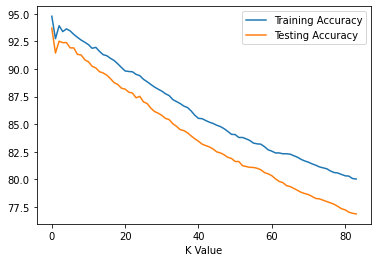

Optimal K Value =  3


In [21]:
plt.plot([(y, z) for x, y, z in datakvariance])
plt.xlabel("K Value")
plt.legend(["Training Accuracy", "Testing Accuracy"])
plt.show()
print("Optimal K Value = ", optimal(datakvariance))

Pada grafik diatas, terlihat bahwa semakin tinggi nilai K nya, maka nilai kemungkinan besar nilai akurasinya turun. Kita juga telah mendapatkan nilai Optimal K nya adalah pada K bernilai 3.

<h2>Proses Training dan Testing</h2>

Data yang telah persiapkan, selanjutnya akan masuk kedalam proses learning menggunakan Algortima KNN. Dengan bantuan fungsi <span style="font-family:'Courier New';">generatedPred()</span> kita akan sekaligus menapilkan data dari Recognition rate dari setiap percobaan. Percobaan kali ini akan dilakukan sebanyak tiga kali dengan melakukan variasi terhadap hyperparameter yaitu pada variabel K yang ada pada classifier KNN. Nilai K yang dimasukkan adalah K dengan Nilai Optimal yang di ambil dari proses sebelumnya, kemudian K yang ditentukan penyusun, yaitu pada K dengan nilai 1 yang merupakan nilai K yang berada dibawah nilai K Optimal dan 20 yang merupakan nilai K yang berada diatas nilai K Optimal. ketiga hasil data ini diharapkan akan mendapatkan data Recognitionnya yang nantinya akan di-export kedalam excel untuk dibandingkan dengan classifier lainnya.

In [14]:
export1A = generatePred(optimal(datakvariance), xtrain, ytrain, xtest, ytest)
export2A = generatePred(1, xtrain, ytrain, xtest, ytest)
export3A = generatePred(20, xtrain, ytrain, xtest, ytest)

,Prediction,Expected,Correct?
0,T,T,Correct
1,T,T,Correct
2,T,T,Correct
3,T,T,Correct
4,T,T,Correct


,Class,Correct,Total,Recognition rate (%)
0,A,405,413,98.060000
1,B,384,466,82.400000
2,C,391,409,95.600000
3,D,389,453,85.870000
4,E,380,421,90.260000
5,F,379,421,90.020000
6,G,385,427,90.160000
7,H,342,398,85.930000
8,I,379,410,92.440000
9,J,376,395,95.190000


Global Accuracy of K=3 is 93.91419391419392


,Prediction,Expected,Correct?
0,T,T,Correct
1,T,T,Correct
2,T,T,Correct
3,T,T,Correct
4,T,T,Correct


,Class,Correct,Total,Recognition rate (%)
0,A,404,408,99.020000
1,B,372,417,89.210000
2,C,382,392,97.450000
3,D,378,409,92.420000
4,E,378,416,90.870000
5,F,382,413,92.490000
6,G,381,426,89.440000
7,H,357,404,88.370000
8,I,394,417,94.480000
9,J,387,397,97.480000


Global Accuracy of K=1 is 94.77414477414477


,Prediction,Expected,Correct?
0,T,T,Correct
1,T,T,Correct
2,T,T,Correct
3,T,T,Correct
4,T,T,Correct


,Class,Correct,Total,Recognition rate (%)
0,A,394,421,93.590000
1,B,376,498,75.500000
2,C,365,382,95.550000
3,D,363,438,82.880000
4,E,362,417,86.810000
5,F,373,434,85.940000
6,G,367,433,84.760000
7,H,322,403,79.900000
8,I,369,403,91.560000
9,J,360,377,95.490000


Global Accuracy of K=20 is 90.13419013419013


<AxesSubplot:xlabel='Class', ylabel='Recognition rate (%)'>

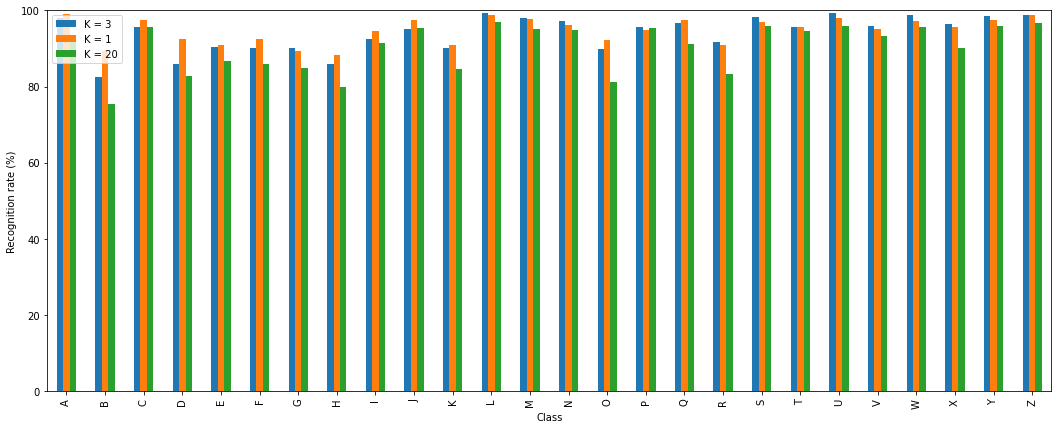

In [15]:
recognition_compare_graph(export1A, export2A, c=export3A)

<h3>Analisis</h3>
Terlihat dari data grafik di atas, <i>Recognition rate</i> pada nilai K yang besar cenderung lebih rendah dibandingkan dengan <i>Recognition rate</i> pada nilai K yang kecil. Nilai K pada kondisi ini ternyata tidak mendapatkan nilai akurasi tertinggi, tetapi sebenarnya nilai K optimal itu merupakan posisi dimana data dan test akan berada pada best fits sehingga kemungkinan besar untuk data random jika kita menggunakan nilai K diluar optimal (terutama dengan K bernilai lebih kecil dari optimal), kemungkinan error nya atau akurasinya justru akan turun sangat signifikan.

<h2>Perukaran data test dan training</h2>
<p>Proses selanjutnya adalah dengan menguji kembali data train dan test dengan membalikan data tersebut kedalam proses classifier. Untuk kondisi ini, karena kami menggunakan fungsi <span style="font-family:'Courier New';">generatePred</span> yang memiliki 5 parameter, yaitu kValue sebagai input hyperparameter dari classifier KNN, xTrain, yTrain sebagai input data train, kemudian xTest dan yTrain sebagai input data test. Proses dibawah ini akan memasukkan data train dan test secara terbalik kedalam fungsi <span style="font-family:'Courier New';">generatedPred</span> sehingga diharapkan bahwa hasil dari predikis baik pada prediksi dengan data normal ataupun dengan data tertukar ini menunjukkan hasil yang cenderung sama sehingga diharapkan dapat disimpulkan bahwa program berjalan dengan baik dan semestinya.</p>
<p>Nilai hyperparameter tetap sama dengan proses sebelumnya yaitu dengan data yang tidak terbalik sehingga harapannya data akan setara sesuai hyperparameter dan aspek lainnya.</p>

In [16]:
export1B = generatePred(optimal(datakvariance), xtest, ytest, xtrain, ytrain)
export2B = generatePred(1, xtest, ytest, xtrain, ytrain)
export3B = generatePred(20, xtest, ytest, xtrain, ytrain)

,Prediction,Expected,Correct?
0,T,T,Correct
1,T,T,Correct
2,T,T,Correct
3,T,T,Correct
4,T,T,Correct


,Class,Correct,Total,Recognition rate (%)
0,A,403,410,98.290000
1,B,389,471,82.590000
2,C,395,418,94.500000
3,D,399,475,84.000000
4,E,376,416,90.380000
5,F,375,408,91.910000
6,G,372,401,92.770000
7,H,344,401,85.790000
8,I,391,414,94.440000
9,J,376,390,96.410000


Global Accuracy of K=3 is 93.77244377244376


,Prediction,Expected,Correct?
0,T,T,Correct
1,T,T,Correct
2,T,T,Correct
3,T,T,Correct
4,T,T,Correct


,Class,Correct,Total,Recognition rate (%)
0,A,401,405,99.010000
1,B,383,427,89.700000
2,C,398,413,96.370000
3,D,397,443,89.620000
4,E,370,390,94.870000
5,F,376,402,93.530000
6,G,381,407,93.610000
7,H,347,391,88.750000
8,I,398,420,94.760000
9,J,385,398,96.730000


Global Accuracy of K=1 is 94.76469476469477


,Prediction,Expected,Correct?
0,T,T,Correct
1,T,T,Correct
2,T,T,Correct
3,T,T,Correct
4,T,H,Incorrect


,Class,Correct,Total,Recognition rate (%)
0,A,390,416,93.750000
1,B,385,515,74.760000
2,C,382,399,95.740000
3,D,379,464,81.680000
4,E,349,404,86.390000
5,F,359,419,85.680000
6,G,366,397,92.190000
7,H,331,405,81.730000
8,I,378,406,93.100000
9,J,364,388,93.810000


Global Accuracy of K=20 is 90.5972405972406


<AxesSubplot:xlabel='Class', ylabel='Recognition rate (%)'>

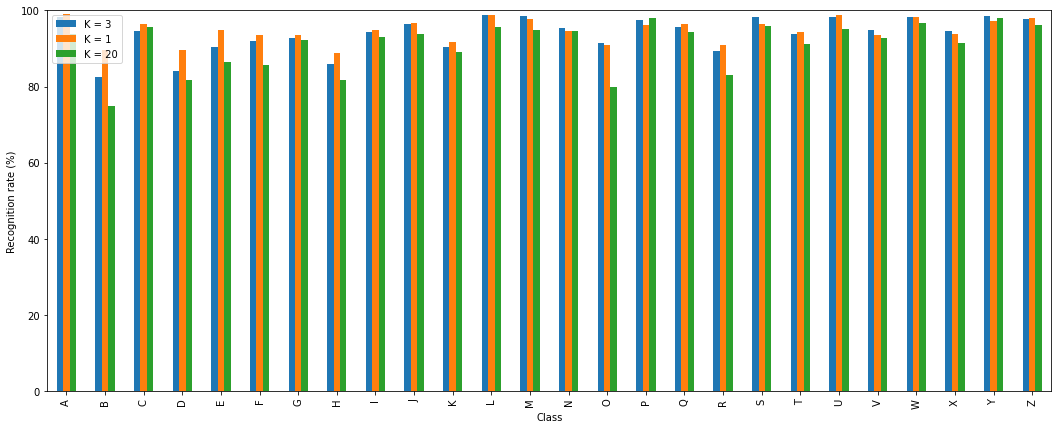

In [17]:
recognition_compare_graph(export1B, export2B, c=export3B)

<AxesSubplot:xlabel='Class', ylabel='Recognition rate (%)'>

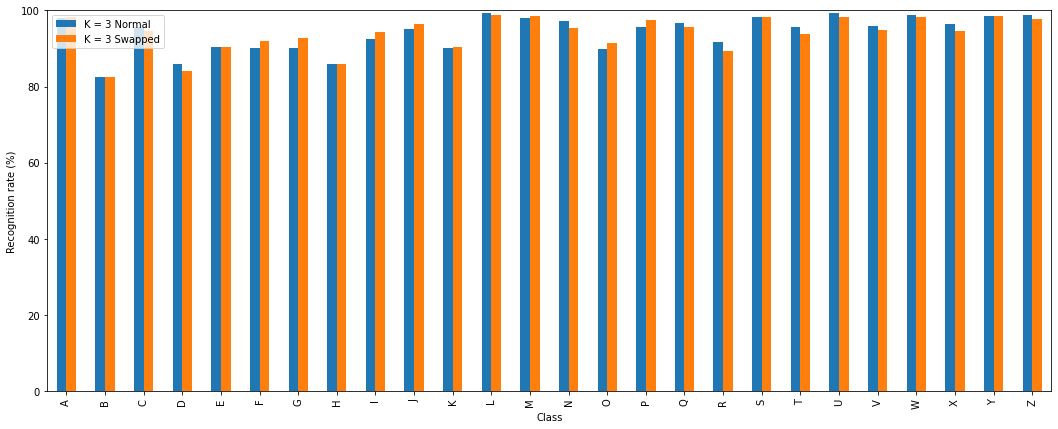

In [18]:
normal = (export1A[0],export1A[1],export1A[2],str(export1A[3]) + ' Normal')
swapped = (export1B[0],export1B[1],export1B[2],str(export1B[3]) + ' Swapped')
recognition_compare_graph(normal, swapped, None)

<h3>Analisis</h3>
Pada grafik di atas, sama seperti kondisi normal, bahwa K Optimal mungkintidak selalu memberikan nilai prediksi dengan Akurasi paling tinggi, tetapi akan memberikan nilai terbaik. untuk perbandingan dari kedua data tersebut yaitu terhadap data normal dan ditukar, ditunjukkan pada grafik yang berada tepat dibawah komentar ini, disimpulkan bahwa kedua data tersebut tidak menimbulkan perbedaan yang signigikan terhadap Accuracy Rate nya, sehingga hal ini menunjukkan bahwa program ini berjalan dengan semestinya, walaupun data yang dimasukkan berbeda.

<AxesSubplot:xlabel='K Variance', ylabel='Acurracy Rate'>

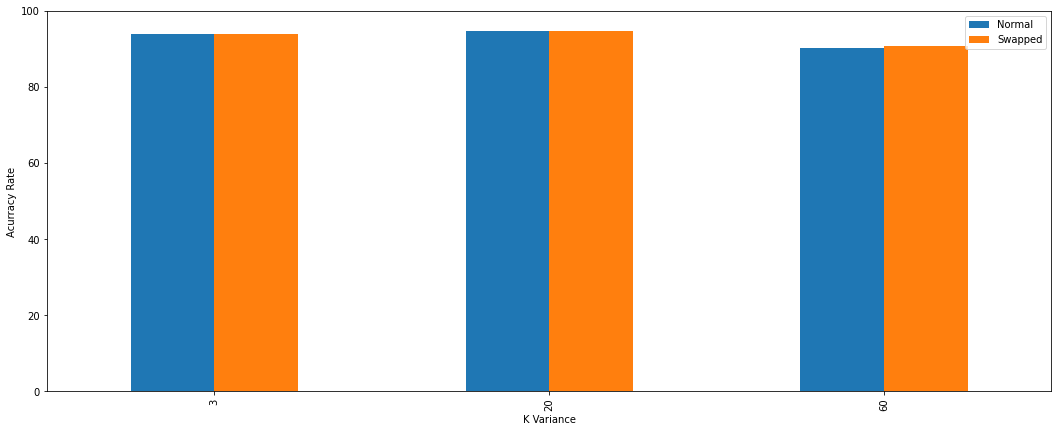

In [19]:
df_normal = pd.DataFrame([export1A[1],export2A[1],export3A[1]])
df_swapped = pd.DataFrame([export1B[1],export2B[1],export3B[1]])
errvalues = pd.concat([df_normal, df_swapped], axis="columns")
plot = errvalues.plot.bar(figsize=(18, 7), ylim=[0, 100])
plot.set(xlabel="K Variance", xticklabels=[3,20,60], ylabel="Acurracy Rate")
plot.legend(['Normal', 'Swapped'])
plot

<h2>Export Kedalam Excel</h2>

Terakhir, data hasil dari learning ini akan tertuang kedalam tabel Recognition Rate dari setiap class nya, data ini akan digunakan untuk membandingkan setiap algorima yang terlibat dalam klasifikasi non-ANN ini. Data tersebut akan dieksport kedalam excel utama yang terdapat beberapa <i>worksheet</i> sebanyak pengujian di setiap algoritma classifier yang digunakan oleh kelompok kami.

In [20]:
import os
from openpyxl import Workbook
from openpyxl import load_workbook
filename = r'../export/export.xlsx'
sheets={
    'name':['KNN-Normal(k-3)','KNN-Normal(k-20)','KNN-Normal(k-60)','KNN-Swapped(k-3)','KNN-Swapped(k-20)','KNN-Swapped(k-60)'],
    'sheet':[export1A,export2A,export3A,export1B,export2B,export3B],
}

if os.path.exists(filename):
    book = load_workbook(filename)
    sheetnames = []
    for i in book.sheetnames:
        if i in sheets['name']:
            book.remove(book[i])
    writer = pd.ExcelWriter(filename,engine="openpyxl")
    writer.book = book
else:
    writer = pd.ExcelWriter(filename,engine="openpyxl")

for i in range(len(sheets['sheet'])):
    sheets['sheet'][i][0].to_excel(writer, sheet_name=sheets['name'][i], index=False, freeze_panes=[1, 0])

writer.save()
writer.close()

KNN cukup mudah diaplikasikan untuk membentuk klasifikasi sebuah data dan saat pembentukan data ini harus memerhatikan nilai K yang cocok untuk membentuk hasil data terbaik.

Referensi : https://medium.com/@avulurivenkatasaireddy/k-nearest-neighbors-and-implementation-on-iris-data-set-f5817dd33711